In [1]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Define year ranges for training and testing sets
train_year_ranges = [('1960', '2000')]
test_year_ranges = [('2001', '2010')]

def year_in_ranges(year, year_ranges):
    return any(start <= year <= end for start, end in year_ranges)

# Read the data (replace with your file path)
df = pd.read_csv('PrunedSheet.csv')

# Keep only numeric columns
df = df.select_dtypes(include=[np.number])

# Create an imputer object that will fill missing values with the mean
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the data and transform it
data_imputed = imputer.fit_transform(df)

# Replace the original data with the imputed data
df = pd.DataFrame(data_imputed, columns=df.columns)

In [2]:
# Convert the 'Time' column to string type
df['Time'] = df['Time'].astype(str)

# Create training and testing sets using the defined year ranges
train_data = df[df['Time'].apply(lambda x: year_in_ranges(x, train_year_ranges))]
test_data = df[df['Time'].apply(lambda x: year_in_ranges(x, test_year_ranges))]

# Split the data into features and target variables
X_train = train_data.drop(['Banking Crisis', 'Time'], axis=1)
y_train = train_data['Banking Crisis']

X_test = test_data.drop(['Banking Crisis', 'Time'], axis=1)
y_test = test_data['Banking Crisis']

In [3]:
X_train.shape

(738, 253)

In [4]:
X_train

,Heritage Economic Freedom Index Score,Property Rights,Government Integrity,Tax Burden,Government Spending,Business Freedom,Labor Freedom,Monetary Freedom,Trade Freedom,Investment Freedom,...,"Energy imports, net (% of energy use)",Energy use (kg of oil equivalent per capita),Fossil fuel energy consumption (% of total),GDP per unit of energy use (constant 2017 PPP $ per kg of oil equivalent),Renewable electricity output (% of total electricity output),Renewable energy consumption (% of total final energy consumption),Renewable internal freshwater resources per capita (cubic meters),Arable land (% of land area),Agricultural land (% of land area),Forest area (% of land area)
0,61.36836,44.204947,34.286219,80.907195,80.645167,62.154603,54.499065,68.808194,68.019435,58.674912,...,-18.225277,849.324734,62.24472,12.287813,61.644419,36.402727,40154.699318,8.418178,37.840269,44.87605
1,61.36836,44.204947,34.286219,80.907195,80.645167,62.154603,54.499065,68.808194,68.019435,58.674912,...,-18.225277,849.324734,62.24472,12.287813,61.644419,36.402727,14119.476790,6.795435,50.363395,44.87605
2,61.36836,44.204947,34.286219,80.907195,80.645167,62.154603,54.499065,68.808194,68.019435,58.674912,...,-18.225277,849.324734,62.24472,12.287813,61.644419,36.402727,13891.294630,7.008466,49.853655,44.87605
3,61.36836,44.204947,34.286219,80.907195,80.645167,62.154603,54.499065,68.808194,68.019435,58.674912,...,-18.225277,849.324734,62.24472,12.287813,61.644419,36.402727,13667.841590,7.161937,49.283989,44.87605
4,61.36836,44.204947,34.286219,80.907195,80.645167,62.154603,54.499065,68.808194,68.019435,58.674912,...,-18.225277,849.324734,62.24472,12.287813,61.644419,36.402727,13450.960450,7.308098,48.707380,44.87605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
931,61.36836,44.204947,34.286219,80.907195,80.645167,62.154603,54.499065,68.808194,68.019435,58.674912,...,-18.225277,849.324734,62.24472,12.287813,61.644419,36.402727,40154.699318,8.418178,37.840269,44.87605
932,61.36836,44.204947,34.286219,80.907195,80.645167,62.154603,54.499065,68.808194,68.019435,58.674912,...,-18.225277,849.324734,62.24472,12.287813,61.644419,36.402727,40154.699318,8.418178,37.840269,44.87605
933,61.36836,44.204947,34.286219,80.907195,80.645167,62.154603,54.499065,68.808194,68.019435,58.674912,...,-18.225277,849.324734,62.24472,12.287813,61.644419,36.402727,40154.699318,8.418178,37.840269,44.87605
934,61.36836,44.204947,34.286219,80.907195,80.645167,62.154603,54.499065,68.808194,68.019435,58.674912,...,-18.225277,849.324734,62.24472,12.287813,61.644419,36.402727,40154.699318,8.418178,37.840269,44.87605


Epoch 1/100
21/21 [==============================] - 2s 23ms/step - loss: 3.4214 - val_loss: 0.3663 - lr: 0.0010
Epoch 2/100
21/21 [==============================] - 0s 8ms/step - loss: 1.9212 - val_loss: 0.3228 - lr: 0.0010
Epoch 3/100
21/21 [==============================] - 0s 7ms/step - loss: 1.4363 - val_loss: 0.2985 - lr: 0.0010
Epoch 4/100
21/21 [==============================] - 0s 6ms/step - loss: 0.9279 - val_loss: 0.2767 - lr: 0.0010
Epoch 5/100
21/21 [==============================] - 0s 5ms/step - loss: 0.7621 - val_loss: 0.2632 - lr: 0.0010
Epoch 6/100
21/21 [==============================] - 0s 5ms/step - loss: 0.6087 - val_loss: 0.2588 - lr: 0.0010
Epoch 7/100
21/21 [==============================] - 0s 6ms/step - loss: 0.5746 - val_loss: 0.2556 - lr: 0.0010
Epoch 8/100
21/21 [==============================] - 0s 6ms/step - loss: 0.5714 - val_loss: 0.2524 - lr: 0.0010
Epoch 9/100
21/21 [==============================] - 0s 5ms/step - loss: 0.4443 - val_loss: 0.2488 - lr

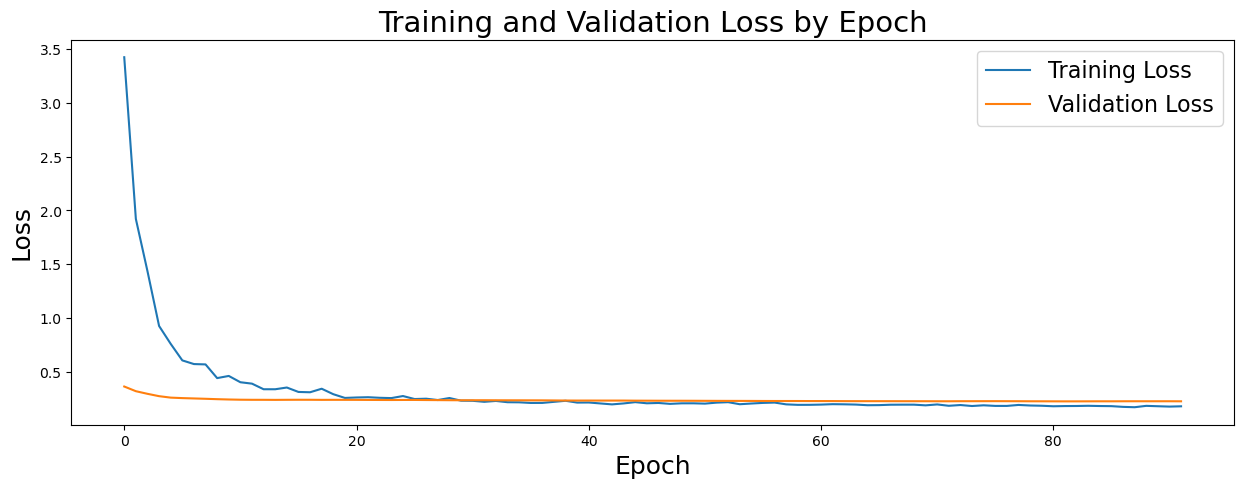

In [5]:
# Scale the features
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the neural net model with additional hidden layer, dropout layers, and L2 regularization
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],), kernel_regularizer=l2(0.001)))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.5))
model.add(Dense(16, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Define early stopping and learning rate reduction callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)


import matplotlib.pyplot as plt

# Train the model and store the training history
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.1, callbacks=[early_stopping, reduce_lr])

test_loss = model.evaluate(X_test_scaled, y_test)
print(f'Test loss: {test_loss}')

# Plot the training and validation loss
plt.figure(figsize=(15, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch', fontsize=18)
plt.ylabel('Loss', fontsize=18)
plt.title('Training and Validation Loss by Epoch', fontsize=21)
plt.legend(fontsize=16)
plt.savefig('StockCrisisLoss.png')
plt.show()


In [6]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


In [7]:
# Preprocess the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the neural net model with additional hidden layer, dropout layers, and L2 regularization
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],), kernel_regularizer=l2(0.001)))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.5))
model.add(Dense(16, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='linear'))

# Make predictions
y_pred = np.argmax(model.predict(X_test_scaled), axis=-1)

6/6 [==============================] - 0s 2ms/step


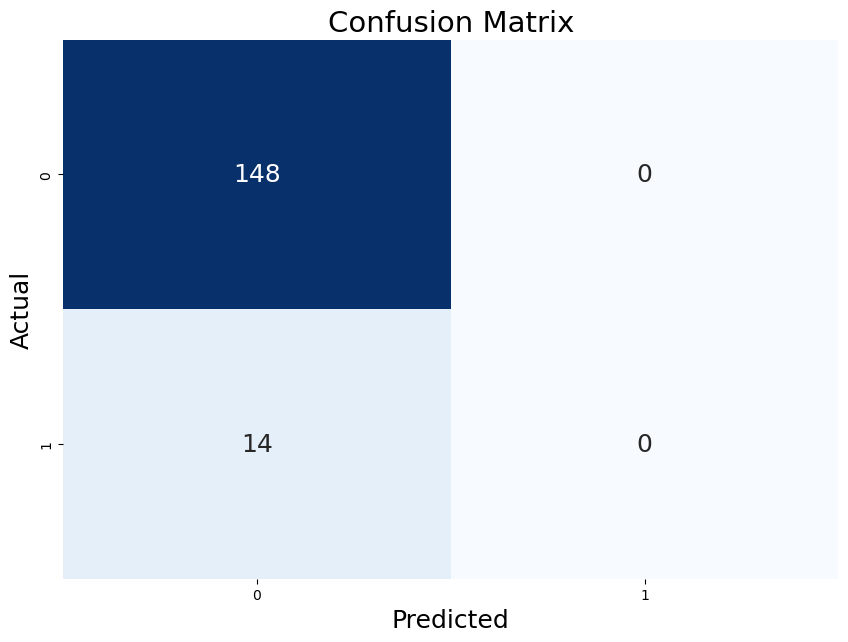

In [8]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 18})
plt.xlabel('Predicted', fontsize=18)
plt.ylabel('Actual', fontsize=18)
plt.title('Confusion Matrix', fontsize=21)
plt.savefig('StockCrisisConfusion.png')
plt.show()


In [9]:
# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95       148
         1.0       0.00      0.00      0.00        14

    accuracy                           0.91       162
   macro avg       0.46      0.50      0.48       162
weighted avg       0.83      0.91      0.87       162



C:\Users\iegin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\iegin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\iegin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
